In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns

Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()

In [3]:
y_true=yts

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')

xtr shape:(60000, 28, 28)
ytr shape:(60000,)


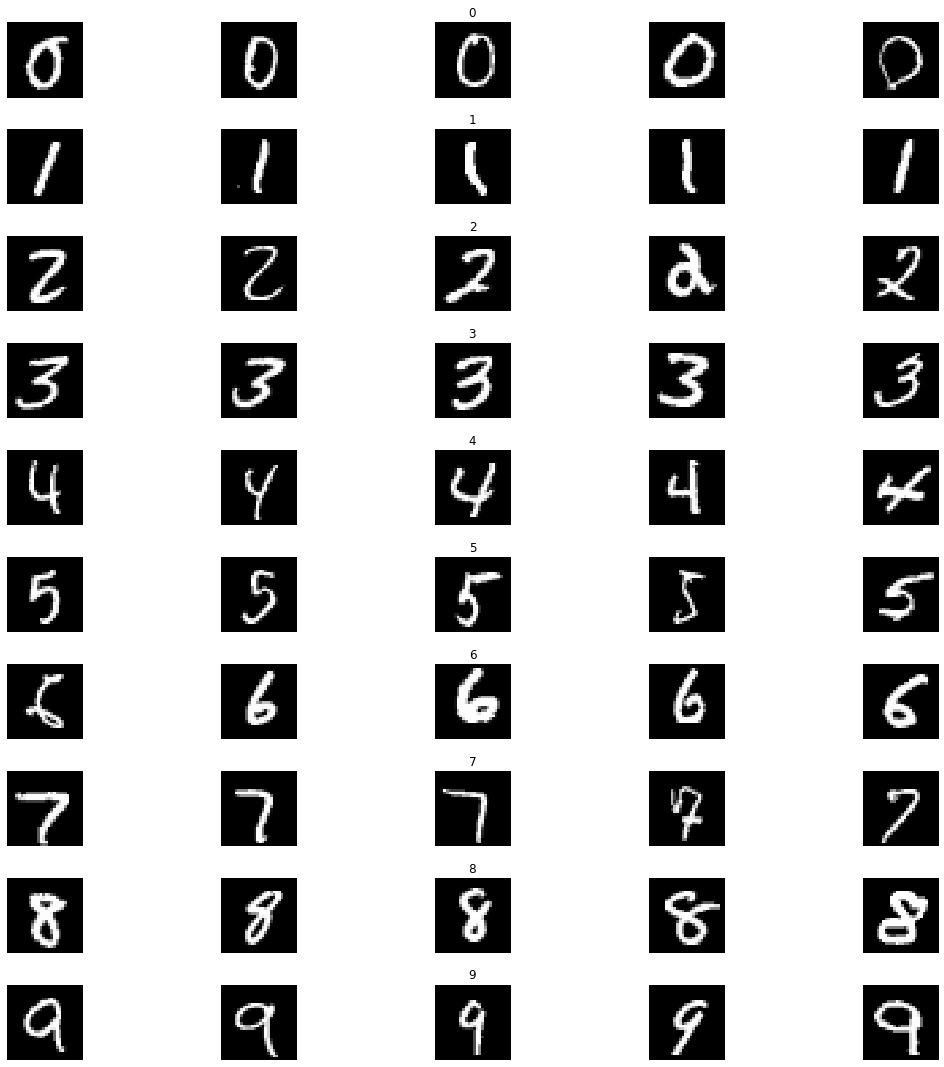

In [5]:
n_cols = 5
n_classes = 10
fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(15,15))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i==2:
            axes[j][i].set_title(str(j))

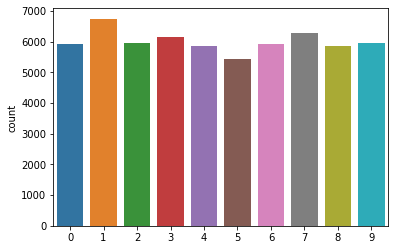

In [6]:
sns.countplot(ytr)
plt.show()

# Pre-processing

In [7]:
n_pixels = xtr.shape[1]*xtr.shape[2]
xtr = xtr.reshape(xtr.shape[0],n_pixels)
xtr = xtr/255


In [8]:
xts = xts.reshape(xts.shape[0],n_pixels)
xts = xts/255

# OneHot Encoding ytr array

In [9]:
from keras.utils.np_utils import to_categorical
ytr=to_categorical(ytr,10) #10 represents number of classes/categories 
yts= to_categorical(yts,10)

In [10]:
ytr.shape

(60000, 10)

# Creating neural net model

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [12]:
def create_model():
    model = Sequential()
    model.add(Dense(32,input_dim=n_pixels,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(10,activation='softmax'))  #outputnode for images in case of images activation will always be softmax
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
h = model.fit(xtr,ytr,epochs=10,verbose=1,validation_data=(xts,yts),batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2797 - accuracy: 0.9166 - val_loss: 0.1613 - val_accuracy: 0.9529
Epoch 2/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1803 - accuracy: 0.9479 - val_loss: 0.1907 - val_accuracy: 0.9480
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.1630 - accuracy: 0.9528 - val_loss: 0.1803 - val_accuracy: 0.9519
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.1503 - accuracy: 0.9570 - val_loss: 0.1772 - val_accuracy: 0.9516
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1420 - accuracy: 0.9598 - val_loss: 0.1608 - val_accuracy: 0.9587
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1328 - accuracy: 0.9619 - val_loss: 0.1647 - val_accuracy: 0.9593
Epoch 7/10
60000/60000 [==============================] - 3s 43us/st

In [14]:
model.save('model.h5')   #saving the model with good accuracy

# Predicting images

In [15]:
import cv2

In [16]:
img=cv2.imread(r"C:\Users\amanv\Documents\ai&mlclass\Datasets\digit.png")

In [17]:
img.shape

(389, 385, 3)

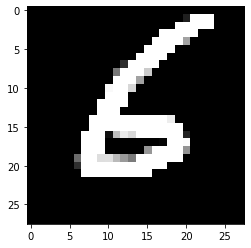

In [18]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [19]:
img = img.reshape(1,n_pixels)
img = img/255

In [20]:
model.predict_classes(img)

array([6], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(xts)
print(confusion_matrix(y_true,y_pred))

[[ 964    0    5    0    0    3    4    0    2    2]
 [   0 1102    5    4    2    1    3    0   12    6]
 [   3    1 1012    2    2    0    1    5    6    0]
 [   1    0   23  957    0   14    0    5    3    7]
 [   3    1    2    1  912    0    9    2    1   51]
 [   4    0    1   11    0  862    7    1    1    5]
 [   7    3    1    1    5    7  928    0    3    3]
 [   1    9   17    4    0    0    1  933    2   61]
 [  13    0   13    6    2   19    0   10  900   11]
 [   2    1    1    4    4    6    0    4    1  986]]
